The objective of this notebook is to exemplify my understanding of, and utilization of, NLP in the context of sentiment analysis. 

The medium of study used was J.K. Rowling's first novel, "Harry Potter and the Sorcer's Stone".

See last cell for results.

In [1]:
import pysbd
import spacy
import string
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step One: Build Sentiment Prediction Model

Training datasets are from reviews of yelp, amazon, and imdb products.

In [2]:
#load model datasets
data_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header = None)
data_amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)
data_imdb = pd.read_csv('imdb_labelled.txt', sep='\t', header = None)

In [3]:
#set column name for model datasets
columns_name = ['Review', 'Sentiment']
data_yelp.columns = columns_name
data_amazon.columns = columns_name
data_imdb.columns = columns_name

#append datasets into one 
data = data_yelp.append([data_amazon, data_imdb], ignore_index = True)
data.shape

(2748, 2)

In [4]:
#inspect model dataset
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
punct = string.punctuation

nlp = spacy.load('en_core_web_sm')

stopwords = list(STOP_WORDS)

In [6]:
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    #lammentize into lower format
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    #remove stop words
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
            
    return cleaned_tokens

In [7]:
text_data_cleaning("This is a test to see if it works, so yeah.")

['test', 'work', 'yeah']

In [8]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

In [9]:
X = data['Review']
y = data['Sentiment']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [12]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7f9d18125cb0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       285
           1       0.79      0.74      0.77       265

    accuracy                           0.78       550
   macro avg       0.78      0.78      0.78       550
weighted avg       0.78      0.78      0.78       550



In [15]:
clf.predict(["I hate this book."])

array([0])

In [16]:
clf.predict(["I love this book."])

array([1])

# STEP TWO: Prepare Study Medium for Sentiment Analysis

In [17]:
#load hp book
data_hp_1 = pd.read_csv("Book 1 - The Philosopher's Stone.txt", sep='\t', header=None)

In [18]:
#inspect
data_hp_1[:20]

,0
0,THE BOY WHO LIVED
1,"Mr. and Mrs. Dursley, of number four, Privet D..."
2,were proud to say that they were perfectly nor...
3,thank you very much. They were the last people...
4,expect to be involved in anything strange or
5,"mysterious, because they just didn’t hold with..."
6,nonsense.
7,Mr. Dursley was the director of a firm called
8,"Grunnings, which made drills. He was a big, be..."
9,"man with hardly any neck, although he did have a"


In [19]:
#set column name
columns_name = ['col_1']
data_hp_1.columns = columns_name

In [20]:
#pass cleaned df into one continous string, in prep for segmenter analysis
new_str = ''
for item in data_hp_1['col_1']:
    new_str += item
    
#rename for consistency
data_hp_1 = new_str
new_str = None

#inspect new string
data_hp_1[:1000]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t m

In [21]:
#pass df through segmenter, compliments of pysbd
seg = pysbd.Segmenter(language="en", clean=False)
data_hp_1 = seg.segment(data_hp_1)

In [22]:
#inspect results of segmentation 
data_hp_1[:10]

['THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.',
 'They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.',
 'Mr. Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 'The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 'They didn’t think they could bear it if anyone found out about the Potters.',
 'Mrs. Potter was Mrs. Du

In [23]:
#convert into df
data_hp_1 = pd.DataFrame(data_hp_1)

#rename column and add blank prediction column
columns_name = ['col_1']
data_hp_1.columns = columns_name
data_hp_1['predictions'] = ""

In [24]:
#inspect results of segmentation 
data_hp_1[:10]

,col_1,predictions
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of num...",
1,They were the last people you’d expect to be i...,
2,Mr. Dursley was the director of a firm called ...,
3,"He was a big, beefy man with hardly any neck, ...",
4,Mrs. Dursley was thin and blonde and had nearl...,
5,The Dursley s had a small son called Dudley an...,
6,"The Dursleys had everything they wanted, but t...",
7,They didn’t think they could bear it if anyone...,
8,"Mrs. Potter was Mrs. Dursley’s sister, but the...",
9,The Dursleys shuddered to think what the neigh...,


# Step Three: Run Sentiment Analysis and Display Results

In [25]:
#compute and insert sentiment predictions into 'predictions' column

data_pred = []
for item in data_hp_1['col_1']:
    pred = clf.predict([item])[0]
    data_pred.append(pred)

data_hp_1['predictions'] = data_pred
data_pred = None

In [26]:
#inspect
data_hp_1[:20]

,col_1,predictions
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of num...",1
1,They were the last people you’d expect to be i...,0
2,Mr. Dursley was the director of a firm called ...,0
3,"He was a big, beefy man with hardly any neck, ...",0
4,Mrs. Dursley was thin and blonde and had nearl...,1
5,The Dursley s had a small son called Dudley an...,1
6,"The Dursleys had everything they wanted, but t...",1
7,They didn’t think they could bear it if anyone...,0
8,"Mrs. Potter was Mrs. Dursley’s sister, but the...",1
9,The Dursleys shuddered to think what the neigh...,0


In [27]:
data_hp_1.predictions.value_counts()

0    5302
1    1775
Name: predictions, dtype: int64

In [28]:
#index rows that contain chapter title
chapter_one = data_hp_1[data_hp_1['col_1'].str.contains('THE BOY WHO LIVED')]
chapter_two = data_hp_1[data_hp_1['col_1'].str.contains('THE VANASHIG GLASS')]
chapter_three = data_hp_1[data_hp_1['col_1'].str.contains('THE LETTERS FROM NO ONE')]
chapter_four = data_hp_1[data_hp_1['col_1'].str.contains('THE KEEPER OF THE KEYS')]
chapter_five = data_hp_1[data_hp_1['col_1'].str.contains('DIAGON ALLY')]
chapter_six = data_hp_1[data_hp_1['col_1'].str.contains('THE JOURNEY FROM PLATFORM')]
chapter_seven = data_hp_1[data_hp_1['col_1'].str.contains('THE SORTING HAT')]
chapter_eight = data_hp_1[data_hp_1['col_1'].str.contains('THE POTIONS MASTER')]
chapter_nine = data_hp_1[data_hp_1['col_1'].str.contains('THE MIDNIGHT DUEL')]
chapter_ten = data_hp_1[data_hp_1['col_1'].str.contains('HALLOWEEN')]
chapter_eleven = data_hp_1[data_hp_1['col_1'].str.contains('QUIDDITCH')]
chapter_twelve = data_hp_1[data_hp_1['col_1'].str.contains('THE MIRROR OF ERISED')]
chapter_thirteen = data_hp_1[data_hp_1['col_1'].str.contains('NICHOLAS')]
chapter_fourteen = data_hp_1[data_hp_1['col_1'].str.contains('NORBERT THE NORWEGIAN')]
chapter_fifteen = data_hp_1[data_hp_1['col_1'].str.contains('THE FORBIDDEN FOREST')]
chapter_sixteen = data_hp_1[data_hp_1['col_1'].str.contains('THROUGH THE TRAPDOOR')]
chapter_seventeen = data_hp_1[data_hp_1['col_1'].str.contains('THE MAN WITH TWO FACES')]

In [29]:
#build list of indexes generated above
chapters = [chapter_one, chapter_two, chapter_three, chapter_four, chapter_five,
           chapter_six, chapter_seven, chapter_eight, chapter_nine, chapter_ten,
           chapter_eleven, chapter_twelve, chapter_thirteen, chapter_fourteen,
           chapter_fifteen, chapter_sixteen, chapter_seventeen]

#parse through list and print
temp = 0
for item in chapters:
    temp += 1
    print('Chapter:',temp, 'starts at ', item.index[0]+1)

Chapter: 1 starts at  1
Chapter: 2 starts at  247
Chapter: 3 starts at  532
Chapter: 4 starts at  775
Chapter: 5 starts at  958
Chapter: 6 starts at  1340
Chapter: 7 starts at  2022
Chapter: 8 starts at  2717
Chapter: 9 starts at  3173
Chapter: 10 starts at  3557
Chapter: 11 starts at  3813
Chapter: 12 starts at  4030
Chapter: 13 starts at  4376
Chapter: 14 starts at  4610
Chapter: 15 starts at  5151
Chapter: 16 starts at  5944
Chapter: 17 starts at  6782


In [30]:
#aggregate df rows relative to indexes found in above cell
chapter_one = data_hp_1.predictions[:246]
chapter_two = data_hp_1.predictions[247:531]
chapter_three = data_hp_1.predictions[532:744]
chapter_four = data_hp_1.predictions[745:957]
chapter_five = data_hp_1.predictions[958:1339]
chapter_six = data_hp_1.predictions[1340:2021]
chapter_seven = data_hp_1.predictions[2022:2716]
chapter_eight = data_hp_1.predictions[2717:3172]
chapter_nine = data_hp_1.predictions[3173:3556]
chapter_ten = data_hp_1.predictions[3557:3812]
chapter_eleven = data_hp_1.predictions[3813:4029]
chapter_twelve = data_hp_1.predictions[4030:4375]
chapter_thirteen = data_hp_1.predictions[4376:4609]
chapter_fourteen = data_hp_1.predictions[4610:5150]
chapter_fifteen = data_hp_1.predictions[5151:5943]
chapter_sixteen = data_hp_1.predictions[5944:6781]
chapter_seventeen = data_hp_1.predictions[6782:]

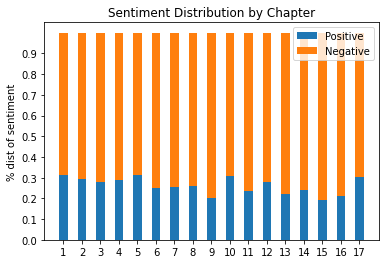

In [31]:
#plot basic figure to display sentiment distribution, per chapter
N = 17
pos_sent = (chapter_one.value_counts(1)[1],
            chapter_two.value_counts(1)[1],
            chapter_three.value_counts(1)[1],
            chapter_four.value_counts(1)[1],
            chapter_five.value_counts(1)[1],
            chapter_six.value_counts(1)[1],
            chapter_seven.value_counts(1)[1],
            chapter_eight.value_counts(1)[1],
            chapter_nine.value_counts(1)[1],
            chapter_ten.value_counts(1)[1],
            chapter_eleven.value_counts(1)[1],
            chapter_twelve.value_counts(1)[1],
            chapter_thirteen.value_counts(1)[1],
            chapter_fourteen.value_counts(1)[1],
            chapter_fifteen.value_counts(1)[1],
            chapter_sixteen.value_counts(1)[1],
            chapter_seventeen.value_counts(1)[1])

neg_sent = (chapter_one.value_counts(1)[0],
            chapter_two.value_counts(1)[0],
            chapter_three.value_counts(1)[0],
            chapter_four.value_counts(1)[0],
            chapter_five.value_counts(1)[0],
            chapter_six.value_counts(1)[0],
            chapter_seven.value_counts(1)[0],
            chapter_eight.value_counts(1)[0],
            chapter_nine.value_counts(1)[0],
            chapter_ten.value_counts(1)[0],
            chapter_eleven.value_counts(1)[0],
            chapter_twelve.value_counts(1)[0],
            chapter_thirteen.value_counts(1)[0],
            chapter_fourteen.value_counts(1)[0],
            chapter_fifteen.value_counts(1)[0],
            chapter_sixteen.value_counts(1)[0],
            chapter_seventeen.value_counts(1)[0])

ind = np.arange(N)
width = 0.45

p1 = plt.bar(ind, pos_sent, width)
p2 = plt.bar(ind, neg_sent, width, bottom=pos_sent)

plt.ylabel('% dist of sentiment')
plt.title('Sentiment Distribution by Chapter')
plt.xticks(ind, ('1', '2', '3', '4', '5', '6',
                 '7', '8', '9', '10', '11', '12', 
                 '13', '14', '15', '16', '17'))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.show()

In [32]:
#pos_sent, print z-scores of each chapter
stats.zscore(np.asarray(pos_sent))

array([ 1.34026579,  0.79607302,  0.43025651,  0.67761815,  1.39146099,
       -0.32145408, -0.21737475, -0.00928609, -1.52700053,  1.25625037,
       -0.6759997 ,  0.42918103, -1.01516353, -0.5060531 , -1.80162009,
       -1.29078351,  1.04362952])

In [33]:
#end of notebook